In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("nepal-trek-data.csv")


df['Cost (USD)'] = (
    df['Cost (USD)']
    .astype(str)
    .str.replace('\n', '', regex=False)
    .str.replace('USD', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)


df = df.drop(columns=['Contact or Book your Trip'], errors='ignore')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df['Days'] = (
    df['Time']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

# --- Clean Max Altitude  ---
df['Maximum Altitude'] = (
    df['Max Altitude']
    .astype(str)
    .str.extract(r'(\d{3,5})')   
    .astype(float)
)

df = df.drop(columns=['Max Altitude'], errors='ignore')

df.head()


,Trek,Cost (USD),Time,Trip Grade,Accomodation,Best Travel Time,Days,Maximum Altitude
0,Everest Base Camp Trek,1420.0,16 Days,Moderate,Hotel/Guesthouse,March - May & Sept - Dec,16.0,5545.0
1,Everest Base Camp Short Trek,1295.0,14 Days,Moderate,Hotel/Guesthouse,March - May & Sept - Dec,14.0,5545.0
2,Everest Base Camp Heli Shuttle Trek,2000.0,12 Days,Moderate,Hotel/Guesthouse,March - May & Sept - Dec,12.0,5545.0
3,Everest Base Camp Heli Trek,3300.0,11 Days,Moderate,Hotel/Guesthouse,March - May & Sept - Dec,11.0,5545.0
4,Everest Base Camp Trek for Seniors,1800.0,20 Days,Moderate,Hotel/Guesthouse,March - May & Sept - Dec,20.0,5545.0


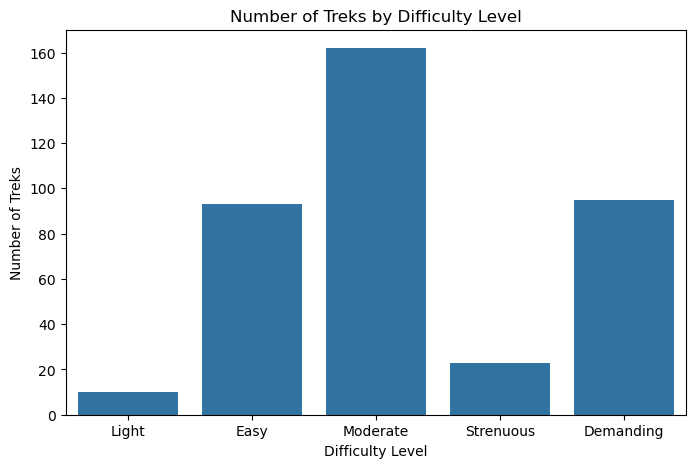

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Trip Grade'].unique()

grade_map = {
    'Light': 'Light',
    'Light+Moderate': 'Light',

    'Easy': 'Easy',
    'Easy To Moderate': 'Easy',
    'Easy-Moderate': 'Easy',

    'Moderate': 'Moderate',
    'Moderate+Demanding': 'Moderate',
    'Moderate-Hard': 'Moderate',

    'Strenuous': 'Strenuous',

    'Demanding': 'Demanding',
    'Demanding+Challenging': 'Demanding'
}

df['Trip Grade Cleaned'] = df['Trip Grade'].map(grade_map)



plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Trip Grade Cleaned',
    order=['Light', 'Easy', 'Moderate', 'Strenuous', 'Demanding']
)
plt.title("Number of Treks by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Treks")
plt.show()



## Moderate-grade treks dominate the dataset, indicating most treks are designed for average fitness levels.

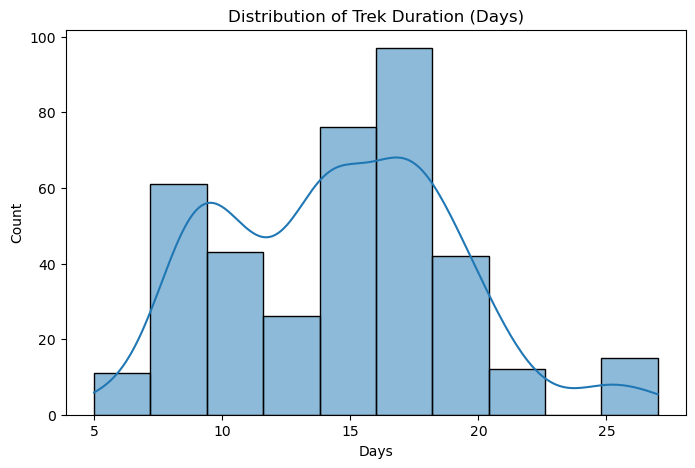

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Days'], bins=10, kde=True)
plt.title("Distribution of Trek Duration (Days)")
plt.show()

## Most treks last between short to medium duration, suitable for travelers with limited time.

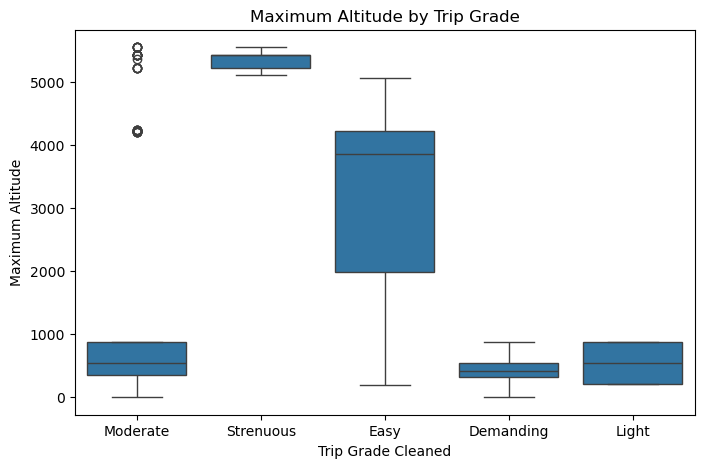

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Trip Grade Cleaned', y='Maximum Altitude')
plt.title("Maximum Altitude by Trip Grade")
plt.show()

## Higher trip grades are associated with higher maximum altitudes, reflecting increased physical challenge.

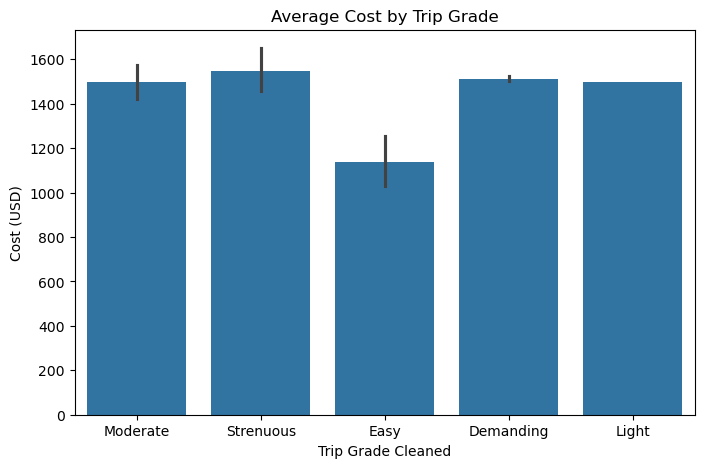

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Trip Grade Cleaned', y='Cost (USD)')
plt.title("Average Cost by Trip Grade")
plt.show()

## More difficult treks tend to be more expensive due to logistics, guides, and safety requirements.

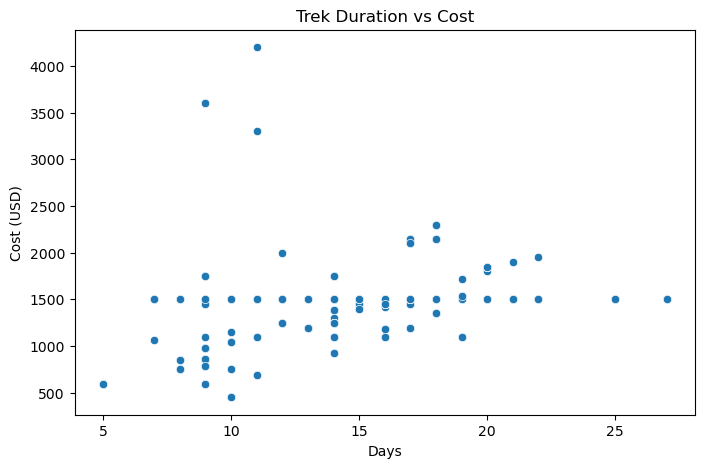

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Days', y='Cost (USD)')
plt.title("Trek Duration vs Cost")
plt.show()


## There is a positive trend showing that longer treks generally cost more.

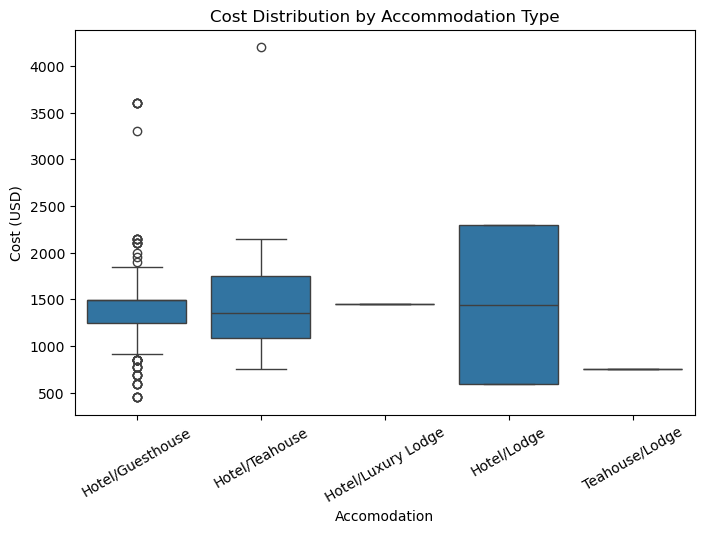

In [29]:
accommodation_map = {
    'Hotel/Guesthouse': 'Hotel/Guesthouse',
    'Hotel/Guest Houses': 'Hotel/Guesthouse',
    'Hotel/Guesthouses': 'Hotel/Guesthouse',
    'Hotel/Teahouse': 'Hotel/Teahouse',
    'Hotel/Teahouses': 'Hotel/Teahouse',
    'Hotel/Luxury Lodges': 'Hotel/Luxury Lodge',
    'Hotel/Lodges': 'Hotel/Lodge',
    'Teahouses/Lodges': 'Teahouse/Lodge'
}

df['Accomodation'] = df['Accomodation'].map(accommodation_map)

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Accomodation', y='Cost (USD)')
plt.xticks(rotation=30)
plt.title("Cost Distribution by Accommodation Type")
plt.show()

## Treks with higher-standard accommodations show higher cost variability and higher median prices.

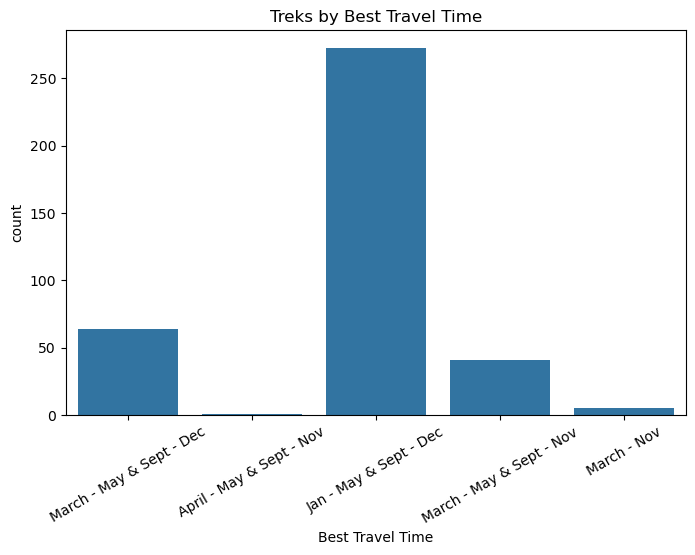

In [34]:


import re

# Function to clean each value
def clean_travel_time(x):
    if pd.isna(x):
        return x
    x = x.replace('.', '')                  # remove trailing dots
    x = x.replace('Setpt', 'Sept')         # fix typos
    x = re.sub(r'\s*-\s*', ' - ', x)       # standardize hyphen spacing
    x = re.sub(r'\s*&\s*', ' & ', x)       # standardize ampersand spacing
    x = re.sub(r'\s+', ' ', x).strip()     # remove extra spaces
    return x


df['Best Travel Time'] = df['Best Travel Time'].apply(clean_travel_time)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Best Travel Time')
plt.xticks(rotation=30)
plt.title("Treks by Best Travel Time")
plt.show()

## Spring and autumn seasons are the most recommended periods for trekking due to favorable weather.

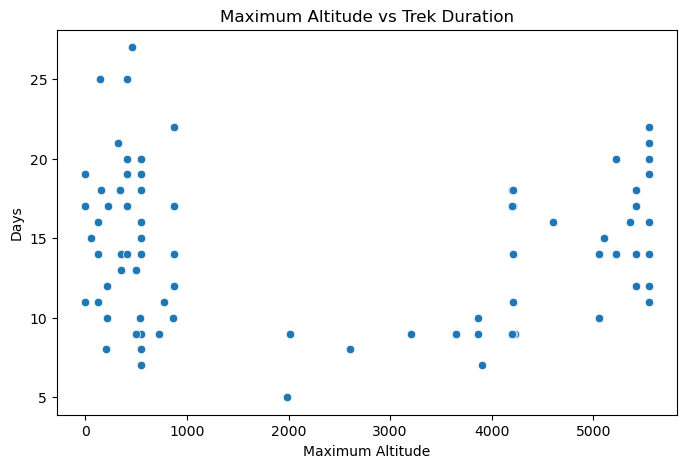

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Maximum Altitude', y='Days')
plt.title("Maximum Altitude vs Trek Duration")
plt.show()


## Treks reaching higher altitudes generally require more days for acclimatization.

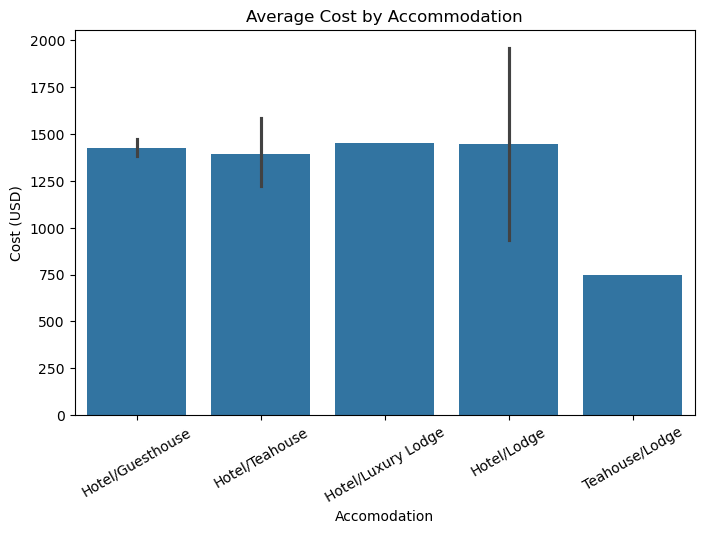

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Accomodation', y='Cost (USD)')
plt.xticks(rotation=30)
plt.title("Average Cost by Accommodation")
plt.show()


## Lodge and hotel-based treks tend to be more expensive than basic teahouse treks.

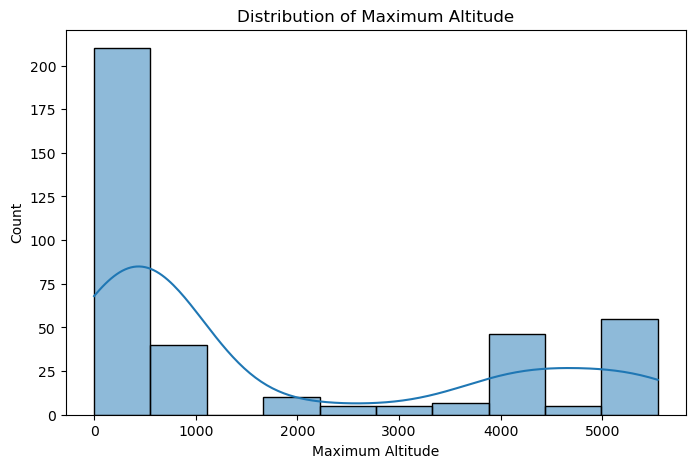

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Maximum Altitude'], bins=10, kde=True)
plt.title("Distribution of Maximum Altitude")
plt.show()


## Most treks fall within mid-to-high altitude ranges, with fewer extreme-altitude expeditions.